<h1 align='center'> Top performence Keyword and ObjectPropperties

In [25]:
import pandas as pd
import numpy as np

In [26]:
data = pd.read_csv('ad_TextImageAnalysis.csv')

In [27]:
data.shape

(993600, 9)

In [28]:
data.head()

,Object ID,Results,Cost Per Result,CTR,Creative Attachment,Link,image_id,Key_Words,Image_props
0,1,29536,186,1.48,988,https://www.facebook.com/ads/image/?d=AQII31oc...,509,"['Nippon', 'india', 'Mutual', 'Fund', 'Wealth'...",['person']
1,308,24691,466,0.15,988,https://www.facebook.com/ads/image/?d=AQII31oc...,509,"['Nippon', 'india', 'Mutual', 'Fund', 'Wealth'...",['person']
2,3140,87286,459,0.88,988,https://www.facebook.com/ads/image/?d=AQII31oc...,509,"['Nippon', 'india', 'Mutual', 'Fund', 'Wealth'...",['person']
3,7646,88571,109,1.88,988,https://www.facebook.com/ads/image/?d=AQII31oc...,509,"['Nippon', 'india', 'Mutual', 'Fund', 'Wealth'...",['person']
4,13183,66433,236,1.88,988,https://www.facebook.com/ads/image/?d=AQII31oc...,509,"['Nippon', 'india', 'Mutual', 'Fund', 'Wealth'...",['person']


In [41]:
data = data[['Results', 'Cost Per Result', 'CTR','Image_props']]

# Grouping of data based on Cost and profit

## Image Properties
__Sorting based on Cost Per Result__

In [30]:
cpr_gp = data.groupby('Image_props')['Cost Per Result'].mean()
#.plot.bar()

In [31]:
cpr_sort =cpr_gp.sort_values()

In [32]:
cpr_sort.head(30)

Image_props
['sofa', 'pottedplant', 'bottle']                                                226.898361
['diningtable', 'chair']                                                         229.741379
['chair', 'refrigerator', 'clock', 'bowl']                                       233.107362
['bowl', 'broccoli', 'carrot']                                                   233.798535
['bed', 'person']                                                                236.068493
['pottedplant', 'oven']                                                          236.071672
['person', 'sandwich']                                                           236.904110
['bed', 'handbag', 'pottedplant']                                                237.445993
['cake']                                                                         237.634862
['tvmonitor', 'person', 'diningtable', 'chair', 'pottedplant', 'bowl', 'cup']    238.510345
['oven', 'pottedplant', 'vase']                                     

__Sorting based on Profit__

In [52]:
ctr_gp = data.groupby('Image_props')['CTR'].mean()

In [55]:
ctr_sort =ctr_gp.sort_values(ascending=False)

In [56]:
ctr_sort.head(30)

Image_props
['person', 'diningtable', 'chair', 'pottedplant', 'cup', 'bowl']                 1.099966
['person', 'tvmonitor', 'tie']                                                   1.085850
['book', 'cell phone', 'person']                                                 1.080836
['bed', 'chair']                                                                 1.068265
['diningtable', 'chair', 'bottle', 'orange']                                     1.067491
['person', 'sofa', 'chair', 'book', 'bottle', 'cell phone']                      1.066057
['bowl', 'cup']                                                                  1.064198
['bowl', 'pottedplant', 'bottle']                                                1.058107
['tvmonitor', 'person', 'diningtable', 'chair', 'pottedplant', 'bowl', 'cup']    1.057103
['toothbrush', 'person']                                                         1.053917
['tvmonitor']                                                                    1.05162

__Sorting based on Results__

In [57]:
results_gp = data.groupby('Image_props')['Results'].mean()
results_sort =results_gp.sort_values(ascending=False)
results_sort.head(30)

Image_props
['oven', 'pottedplant', 'vase']                                54533.522936
['person', 'chair', 'sofa']                                    53681.835052
['person', 'chair', 'backpack']                                53624.196203
['sofa', 'bowl']                                               53573.321429
['spoon']                                                      53408.716783
['book', 'cell phone', 'person']                               53369.090301
['cell phone', 'laptop', 'chair']                              53131.417241
['cell phone', 'laptop']                                       52969.934483
['truck']                                                      52905.877622
['person', 'surfboard']                                        52839.046584
['remote', 'car']                                              52823.040268
['cup', 'cell phone', 'person']                                52685.383051
['toilet']                                                     52629.195804


In [33]:
data.columns

Index(['Object ID', 'Results', 'Cost Per Result', 'CTR', 'Creative Attachment',
       'Link', 'image_id', 'Key_Words', 'Image_props'],
      dtype='object')

# Clustering of Image properties with other columns

In [58]:
clust_data = data[['Results', 'Cost Per Result', 'CTR', 'Image_props']]

In [59]:
clust_data.head()

,Results,Cost Per Result,CTR,Image_props
0,29536,186,1.48,['person']
1,24691,466,0.15,['person']
2,87286,459,0.88,['person']
3,88571,109,1.88,['person']
4,66433,236,1.88,['person']


In [62]:
X = clust_data.head(10000)

In [63]:
X.shape

(10000, 4)

In [64]:
clust_data.shape

(993600, 4)

In [65]:
!pip install kmodes

You should consider upgrading via the 'C:\Users\hanit\anaconda3\python.exe -m pip install --upgrade pip' command.


In [66]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

<function matplotlib.pyplot.show(*args, **kw)>

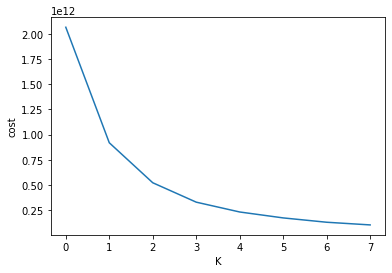

In [67]:
#Choosing optimal K value
cost = []
# X = ad_analysisKwords_df100
for num_clusters in list(range(2,10)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang', random_state=42) 
    kproto.fit(X, categorical=[3])
    cost.append(kproto.cost_)

plt.plot(cost)
plt.xlabel('K')
plt.ylabel('cost')
plt.show

In [68]:
m = KModes(n_clusters=4)

In [69]:
kproto = KPrototypes(n_clusters=4, init='Huang', random_state=42) 
predicted_Cluster = kproto.fit_predict(X, categorical=[3])
print(predicted_Cluster[:10])
    

[3 0 1 1 2 3 0 3 2 1]


In [ ]:
# col_of_cluster = .columns
# col_of_cluster

In [70]:
X['Cluster'] = predicted_Cluster

C:\Users\hanit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
X.head()

,Results,Cost Per Result,CTR,Image_props,Cluster
0,29536,186,1.48,['person'],3
1,24691,466,0.15,['person'],0
2,87286,459,0.88,['person'],1
3,88571,109,1.88,['person'],1
4,66433,236,1.88,['person'],2


In [72]:
def GetClustername(topPerform):
    clusterName = "Cluster-1"
    if topPerform==0:
         clusterName = "Cluster-1"
    elif topPerform==1:
         clusterName = "Cluster-2"
    elif topPerform==2:
         clusterName = "Cluster-3"
    elif topPerform==3:
         clusterName = "Cluster-4"
    return clusterName

In [73]:
X['Clusters'] = X.Cluster.apply(GetClustername)

C:\Users\hanit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
X.head()

,Results,Cost Per Result,CTR,Image_props,Cluster,Clusters
0,29536,186,1.48,['person'],3,Cluster-4
1,24691,466,0.15,['person'],0,Cluster-1
2,87286,459,0.88,['person'],1,Cluster-2
3,88571,109,1.88,['person'],1,Cluster-2
4,66433,236,1.88,['person'],2,Cluster-3


In [75]:
import seaborn as sns

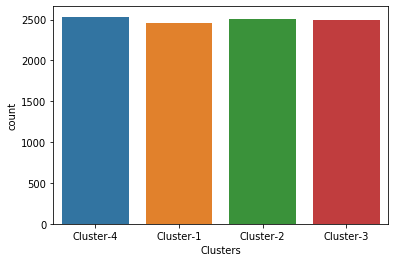

In [76]:
# Plotting Categorical Data
sns.countplot(x="Clusters", data=X)
plt.show()

In [80]:
temp = X[X['Clusters'] == 'Cluster-4']

In [81]:
temp

,Results,Cost Per Result,CTR,Image_props,Cluster,Clusters
0,29536,186,1.48,['person'],3,Cluster-4
5,47550,421,1.28,['person'],3,Cluster-4
7,33105,203,1.32,['person'],3,Cluster-4
12,44925,75,1.81,['person'],3,Cluster-4
14,34671,183,0.44,['person'],3,Cluster-4
...,...,...,...,...,...,...
9981,25260,28,1.28,[],3,Cluster-4
9986,45590,263,1.12,[],3,Cluster-4
9990,27073,493,1.49,[],3,Cluster-4
9991,45832,311,0.84,[],3,Cluster-4


In [28]:
!pip install scikit-learn-extra

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.1.0b2-cp37-cp37m-win_amd64.whl size=102580 sha256=6fd63fe2533f08c9f4091825520df31373a95da05ad627f4215b9a75c5aa2ea1
  Stored in directory: c:\users\hanit\appdata\local\pip\cache\wheels\20\73\08\e2ab008d0275628ccfd985b1f2b370330104d9d4ddb995bb67
Successfully built scikit-learn-extra


You should consider upgrading via the 'C:\Users\hanit\anaconda3\python.exe -m pip install --upgrade pip' command.


In [30]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import copy as cp
%matplotlib inline
from matplotlib import pyplot as plt

In [1]:
class k_medoids:
    def __init__(self, k = 2, max_iter = 300, has_converged = False):
        ''' 
        Class constructor
        Parameters
        ----------
        - k: number of clusters. 
        - max_iter: number of times centroids will move
        - has_converged: to check if the algorithm stop or not
        '''
        self.k = k
        self.max_iter = max_iter
        self.has_converged = has_converged
        self.medoids_cost = []

In [15]:
def initMedoids(self, X):
        ''' 
        Parameters
        ----------
        X: input data. 
        '''
        self.medoids = []
        
        #Starting medoids will be random members from data set X
        indexes = np.random.randint(0, len(X)-1,self.k)
        self.medoids = X[indexes]
        
        for i in range(0,self.k):
            self.medoids_cost.append(0)

In [43]:
new_medoids = []
for i in range(0, self.k):
    new_medoid = self.medoids[i]
    old_medoids_cost = self.medoids_cost[i]
    
    for j in range(len(clusters[i])):
        #Cost of the current data points to be compared with the current optimal cost
        cur_medoids_cost = 0
        
for dpoint_index in range(len(clusters[i])):
                    cur_medoids_cost += euclideanDistance(clusters[i][j], clusters[i][dpoint_index])
                
                #If current cost is less than current optimal cost,
                #make the current data point new medoid of the cluster
if cur_medoids_cost < old_medoids_cost:
                    new_medoid = clusters[i][j]
                    old_medoids_cost = cur_medoids_cost
                    
    #Now we have the optimal medoid of the current cluster
new_medoids.append(new_medoid)
        

NameError: name 'self' is not defined

In [34]:
new_medoids = []
for i in range(0, self.k):
    new_medoid = self.medoids[i]
    old_medoids_cost = self.medoids_cost[i]
    
    for j in range(len(clusters[i])):
        #Cost of the current data points to be compared with the current optimal cost
               
                cur_medoids_cost = 0
                for dpoint_index in range(len(clusters[i])):
                    cur_medoids_cost += euclideanDistance(clusters[i][j], clusters[i][dpoint_index])
                
                #If current cost is less than current optimal cost,
                #make the current data point new medoid of the cluster
                if cur_medoids_cost < old_medoids_cost:
                    new_medoid = clusters[i][j]
                    old_medoids_cost = cur_medoids_cost
            
            #Now we have the optimal medoid of the current cluster
new_medoids.append(new_medoid)

NameError: name 'self' is not defined

In [31]:
#Elbow plot
sse = []
clusterRange = range(1,10)
for k in clusterRange:
    km = KMedoids(n_clusters=k)
    km.fit(clust_data)
    sse.append(km.inertia_)

ValueError: could not convert string to float: "['person']"